# Scatterplot animations

This notebook shows how to make crisp animations of evolving scatterplots. 

**Example 1 // `sklearn.datasets.make_circles` random motion**

**Example 2 // classification embedding MNIST** </br>
As example we plot the evolution of a changing vector embedding of a penultimate layer of a deep neural network; trained to classify handwritten digits. Specifically, every $n$ iterations (= the time) a part of the validation set is visualized as a scatter plot (=frame). 

## Example 1 // `sklearn.datasets.make_circles` random motion

Let's introduce and plot the distribution. The circle datasets generates two noisy distributions of concentric circles. Both have a different radius (and are centered around zero). The noise level can be manually set. The code below creates and plots the binary distribution.

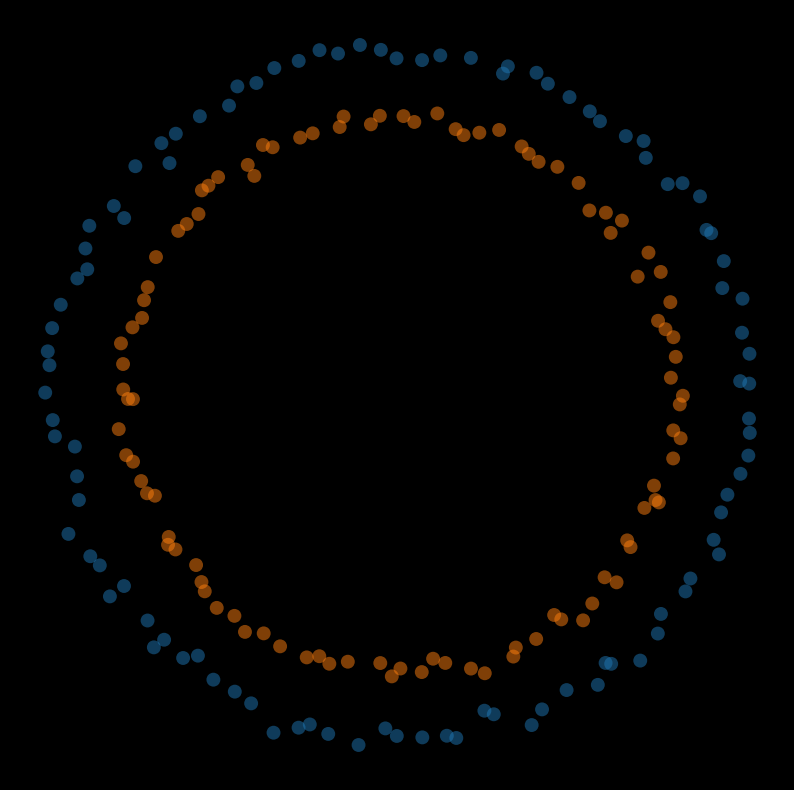

In [6]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

N = 200 # nr of samples (default: 200 // 100 per class)
eps = 0.02 # noise level (default: 0.2)

# // generate dataset: x=coords, y=label (binary) // check sizes
x, y = make_circles(n_samples=N, noise=eps)
x1 = x[y==0, :]
x2 = x[y==1, :]

# // init figure
fs = 10 # fig size (default: 10)
fig, ax = plt.subplots(1,1,figsize=(fs, fs))

# // coloring
cmap = plt.get_cmap('tab10')

# // scatter plot
ax.scatter(x1[:,0], x1[:,1], label=y[y==0], 
           fc=np.array(cmap(0)).reshape(1,4), ec=None,
           s=fs*10, alpha=0.5)
ax.scatter(x2[:,0], x2[:,1], label=y[y==1], 
           fc=np.array(cmap(1)).reshape(1,4), ec=None,
           s=fs*10, alpha=0.5)

# // set nice background
ax.set_facecolor('black')
fig.set_facecolor('black')

# // get rid of axis
_ = ax.axis('off')

Let's add some fancy movement to the all the data points. Let's make the points oscillate around their collective radii. The schedule will be based on a sinussoidal oscillation. For an improved effects: one starts going down; the other up. The radii are computed by averaging. In the next code cell, a full cycle ($2\pi$) will be completed in 16 steps. For the movie later there will be more frames per fully cycle.

In [7]:
import math

# // compute radii of both distributions
r1 = np.sum(np.sqrt(np.power(x1[:,0], 2) + np.power(x1[:,1], 2))) / x1.shape[0]
r2 = np.sum(np.sqrt(np.power(x2[:,0], 2) + np.power(x2[:,1], 2))) / x2.shape[0]

print(f"Approximate radius:"
      f"\n\tRadius 1: {r1:.3f}"
      f"\n\tRadius 2: {r2:.3f}")

# // initialize 'temporal' tensors
T = 16
x1t = np.zeros((T, x1.shape[0], x1.shape[1]))
x2t = np.zeros((T, x2.shape[0], x2.shape[1]))

# compute step size
step = math.pi*2 / T

# set scaling noise per sample
eps_scale_level = 0.05
eps_scale1 = 1 + (np.random.random(x1.shape[0]) - 0.5) * eps_scale_level
eps_scale2 = 1 + (np.random.random(x2.shape[0]) - 0.5) * eps_scale_level

# // compute distribution per time step
for t in range(T):
    scale1 = 1 - math.sin(step*t) * 0.2
    scale2 = 1 + math.sin(step*t) * 0.2
    x1t[t] = x1 * scale1 * np.stack([eps_scale1]*2, axis=1)
    x2t[t] = x2 * scale2 * np.stack([eps_scale2]*2, axis=1)

Approximate radius:
	Radius 1: 1.003
	Radius 2: 0.803


Let's plot them frame by frame. 

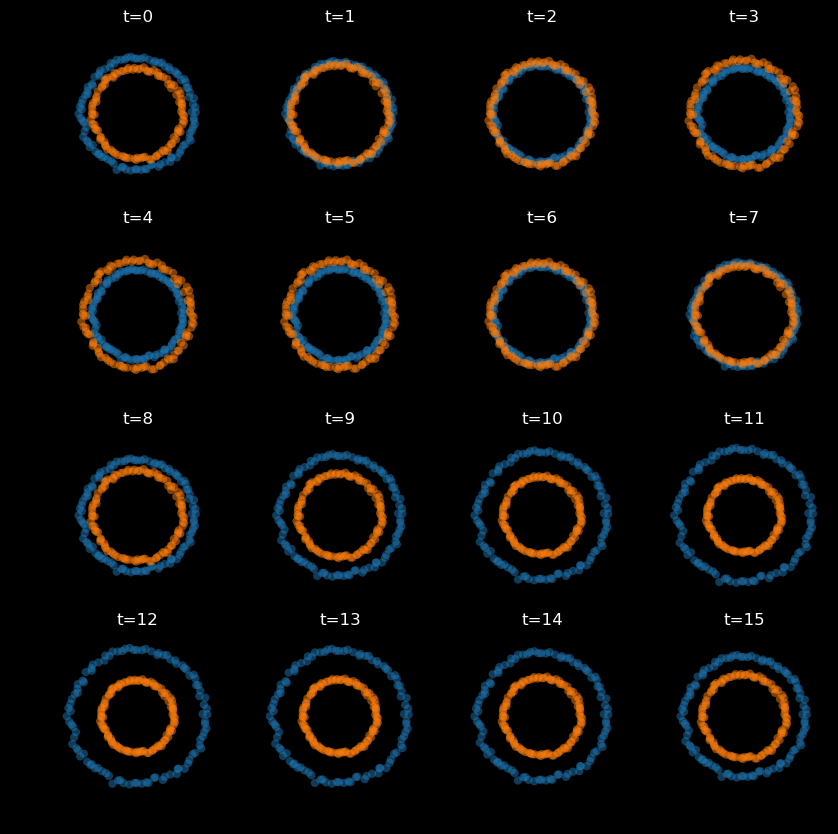

In [8]:
# // init figure
n = int(np.ceil(np.sqrt(T)))
fs = 10 # fig size (default: 10)
fig, axs = plt.subplots(n,n,figsize=(fs, fs))
axs = axs.flatten()

# // coloring
cmap = plt.get_cmap('tab10')

# // scatter plot
for t, ax in enumerate(axs):

    if t < T: # only plot for accessible
        ax.scatter(x1t[t,:,0], x1t[t, :,1], label=y[y==0], 
                fc=np.array(cmap(0)).reshape(1,4), ec=None,
                s=fs*7/(n/2), alpha=0.5)
        ax.scatter(x2t[t,:,0], x2t[t,:,1], label=y[y==1], 
                fc=np.array(cmap(1)).reshape(1,4), ec=None,
                s=fs*7/(n/2), alpha=0.5)
        ax.set_title(f"t={t}", color='white')
        ax.set_xlim([-1.5, 1.5])
        ax.set_ylim([-1.5, 1.5])

    # // set nice background
    ax.set_facecolor('black')
fig.set_facecolor('black')

# // get rid of axis
_ = ax.axis('off')

Make animation using `matplotlib.animation.FuncAnimation`.

In [10]:
from matplotlib import animation

# // initialize 'temporal' tensors
T = 100
x1t = np.zeros((T, x1.shape[0], x1.shape[1]))
x2t = np.zeros((T, x2.shape[0], x2.shape[1]))

# compute step size
step = math.pi*2 / T

# set scaling noise per sample
eps_scale_level = 0.05
eps_scale1 = 1 + (np.random.random(x1.shape[0]) - 0.5) * eps_scale_level
eps_scale2 = 1 + (np.random.random(x2.shape[0]) - 0.5) * eps_scale_level

# // compute distribution per time step
for t in range(T):
    scale1 = 1 - math.sin(step*t) * 0.2
    scale2 = 1 + math.sin(step*t) * 0.2
    x1t[t] = x1 * scale1 * np.stack([eps_scale1]*2, axis=1)
    x2t[t] = x2 * scale2 * np.stack([eps_scale2]*2, axis=1)

# set as list
xs = [x1t, x2t]

MovieWriter ffmpeg unavailable; using Pillow instead.


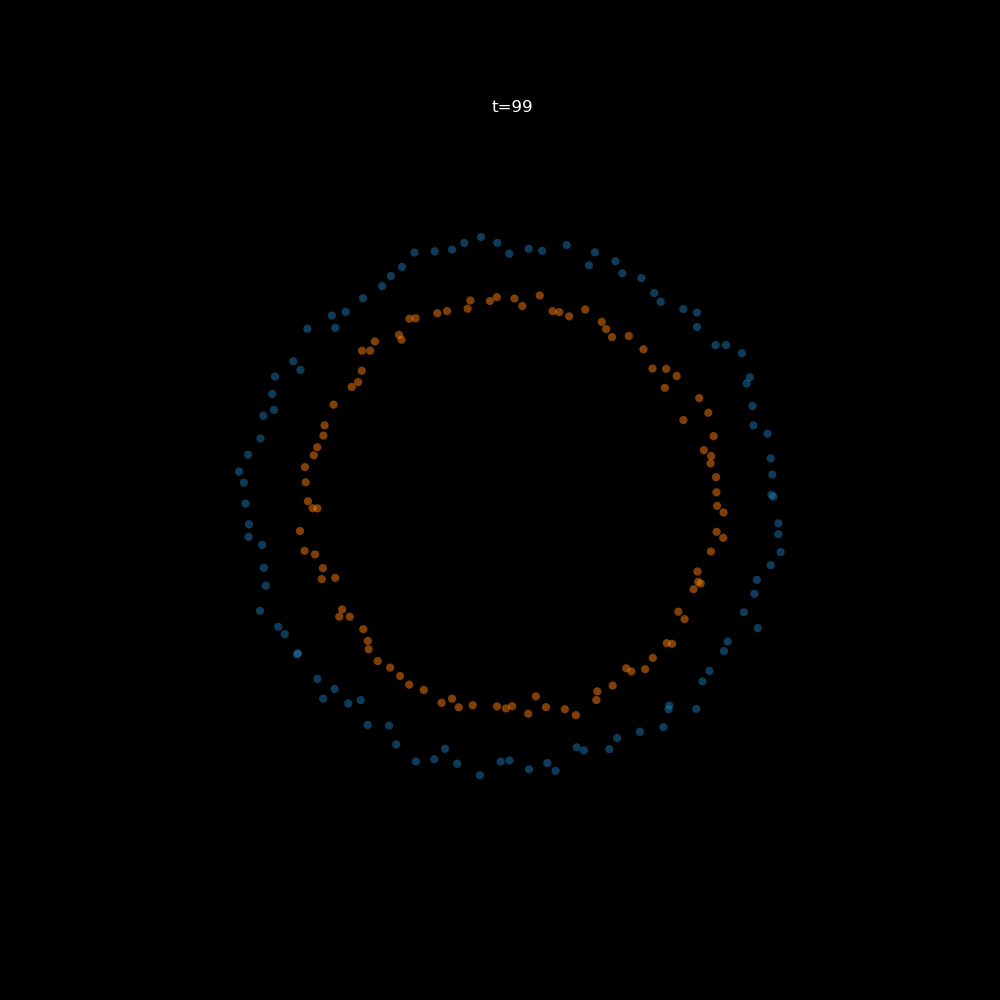

In [13]:
fs = 10
fig, ax = plt.subplots(1,1,figsize=(fs, fs))

def animate(t):

    ax.clear()

    ax.scatter(x1t[t,:,0], x1t[t, :,1], label=y[y==0], 
                fc=np.array(cmap(0)).reshape(1,4), ec=None,
                s=fs*7/(n/2), alpha=0.5)

    ax.scatter(x2t[t,:,0], x2t[t,:,1], label=y[y==1], 
            fc=np.array(cmap(1)).reshape(1,4), ec=None,
            s=fs*7/(n/2), alpha=0.5)

    ax.set_title(f"t={t}", color='white')
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])

    # // set nice background
    ax.set_facecolor('black')

fig.set_facecolor('black')

anim = animation.FuncAnimation(fig, animate, frames=T, interval=100, blit=True)
anim.save('anim.gif') 
plt.show()